<a href="https://colab.research.google.com/github/ArathySatheesh/Machine_Learning/blob/main/CNN_mnist_epochs10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.keras.layers import Dense

In [3]:
from tensorflow.keras.layers import Dropout

In [4]:
from tensorflow.keras.layers import Flatten

In [5]:
from tensorflow.keras.layers import Conv2D

In [6]:
from tensorflow.keras.layers import MaxPooling2D

In [7]:
from tensorflow.keras import backend as K

In [8]:
from tensorflow.keras.optimizers import SGD

In [9]:
from tensorflow.keras.datasets import mnist

In [10]:
import cv2

In [11]:
from google.colab.patches import cv2_imshow

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import matplotlib.image as mpimg

In [15]:
from tensorflow.keras.models import load_model

In [16]:
from PIL import Image

In [17]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Looking at random images in the dataset.Since, the images are small, they are scaled to view properly.

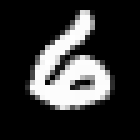

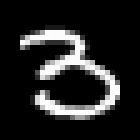

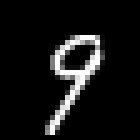

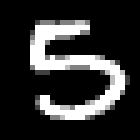

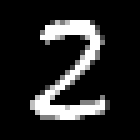

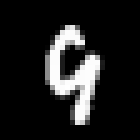

In [ ]:
for i in range(0,6):
  random_num=np.random.randint(0,len(x_train))
  img=x_train[random_num]
  img_scaled=cv2.resize(img,None,fx=5,fy=5,interpolation=cv2.INTER_NEAREST)
  cv2_imshow(img_scaled)
  cv2.waitKey(0)

cv2.destroyAllWindows()

In [18]:
img_rows=x_train[0].shape[0]

In [19]:
img_cols=x_train[0].shape[1]

Reshaping for Keras as 4D

In [20]:
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

Storing the shape of a single image

In [21]:
input_shape=(img_rows,img_cols,1)
num_classes=10

Keras works with float

In [22]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

Normalise from (0 to 255) to (0 to 1)

In [23]:
x_train/=255.0
x_test/=255.0

In [24]:
print('X_train shape:', x_train.shape)
print(x_train.shape[0], 'Train samples')
print(x_test.shape[0], 'Test samples')

X_train shape: (60000, 28, 28, 1)
60000 Train samples
10000 Test samples


One hot encoding for labels

In [25]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [28]:
model=Sequential()

In [29]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

In [30]:
model.add(Conv2D(64,(3,3),activation='relu'))

In [31]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [32]:
model.add(Dropout(0.25))

In [33]:
model.add(Flatten())

In [34]:
model.add(Dense(128,activation='relu'))

In [35]:
model.add(Dropout(0.50))

In [36]:
model.add(Dense(num_classes,activation='softmax'))

In [37]:
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])

In [38]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [39]:
batch_size=32
epochs=10

In [40]:
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 19s 4ms/step - loss: 0.6220 - accuracy: 0.8046 - val_loss: 0.2146 - val_accuracy: 0.9392
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2926 - accuracy: 0.9111 - val_loss: 0.1374 - val_accuracy: 0.9576
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2170 - accuracy: 0.9343 - val_loss: 0.1022 - val_accuracy: 0.9689
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1675 - accuracy: 0.9495 - val_loss: 0.0778 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1382 - accuracy: 0.9600 - val_loss: 0.0644 - val_accuracy: 0.9805
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1194 - accuracy: 0.9644 - val_loss: 0.0562 - val_accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1062 - accuracy: 0.9682 - val_loss: 0.0523 - val_accuracy

In [41]:
score=model.evaluate(x_test,y_test,verbose=0)

In [42]:
score

[0.04233458638191223, 0.9857000112533569]

In [43]:
print("Test Loss : ", score[0])
print("Test Accuracy:",score[1])

Test Loss :  0.04233458638191223
Test Accuracy: 0.9857000112533569


Plotting Loss Chart

In [ ]:
print(history.history.keys())



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# summarize history for accuracy

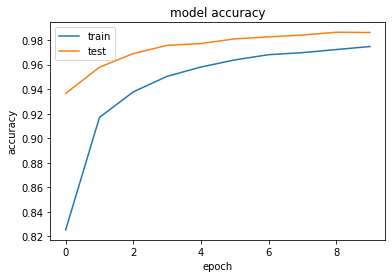

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

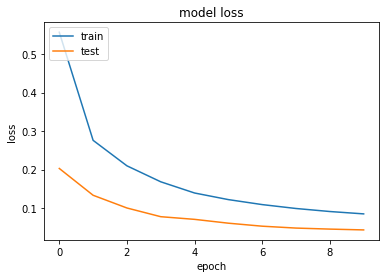

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
model.save("mnist_simple_cnn_10epochs.h5")

In [47]:
classifier=load_model("mnist_simple_cnn_10epochs.h5")

In [44]:
def draw_test(name,pred,input_im):
   BLACK=[0,0,0]
   #Draw a border
   expanded_image=cv2.copyMakeBorder(input_im,0,0,0,image_L.shape[0],cv2.BORDER_CONSTANT,value=BLACK)
   #convert to grayscale
   expanded_image=cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
   #write a text on the image
   cv2.putText(expanded_image,str(pred),(152,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,255,0),2)
   cv2.imshow(name,expanded_image)

In [ ]:
for i in range(10):
  random_num=np.random.randint(0,len(x_test))
  input_im=x_test[random_num]

  image_L=cv2.resize(input_im,None,fx=4,fy=4,interpolation=cv2.INTER_CUBIC)
  input_im=input_im.reshape(1,28,28,1)
  
  res=str(classifier.predict(input_im,1,verbose=0)[0])
  draw_test("Prediction",res,image_L)
  cv2.waitKey(0)
  
cv2.destroyAllWindows()